In [13]:
from __future__ import print_function
import numpy as np
from tensorflow.python import keras
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# AI 포탈과 연계를 위한 기본 객체 생성

In [14]:
from aicentro.session import Session
session = Session(verify=False)

# 학습 모델 개발 시 프레임워크별 객체 사용

In [28]:
from aicentro.framework.framework import BaseFramework as Frm
framework = Frm(session=session)

# 모델 코드 작성

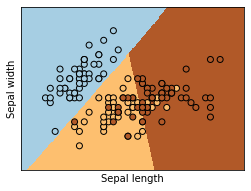

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

logreg = LogisticRegression(C=1e5)

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

# 모델 학습 시 Accuracy 와 Loss 값을 SACP AI 포탈로 전송하여 UI 상에 노출
* 제공된 Metric Callback 사용 

In [31]:


history = framework.get_metric_callback()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[history])

y_test_pred = model.predict(x_test, batch_size=128, verbose=1)
y_label = ['0','1','2','3','4','5','6','7','8','9']

y_test_c = np.argmax(y_test, axis=1).reshape(-1, 1)
y_test_pred_c = np.argmax(y_test_pred, axis=1).reshape(-1, 1)

AttributeError: 'BaseFramework' object has no attribute 'get_metric_callback'

# 모델 학습 후 결과를 저장하고 해당 결과를 UI 상에 노출

In [ ]:
framework.plot_confusion_matrix(y_test_c, y_test_pred_c, target_names=y_label, title='Confusion Matrix')
framework.classification_report(y_test_c, y_test_pred_c, target_names=y_label)
framework.plot_roc_curve(y_test, y_test_pred, len(y_label), y_label)

# 학습된 모델 저장

In [ ]:
framework.save_model(model, model_name='iris-classification')